<a href="https://colab.research.google.com/github/sarker2018/VIsaualisation/blob/main/R_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scatter Plot with time evolution


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


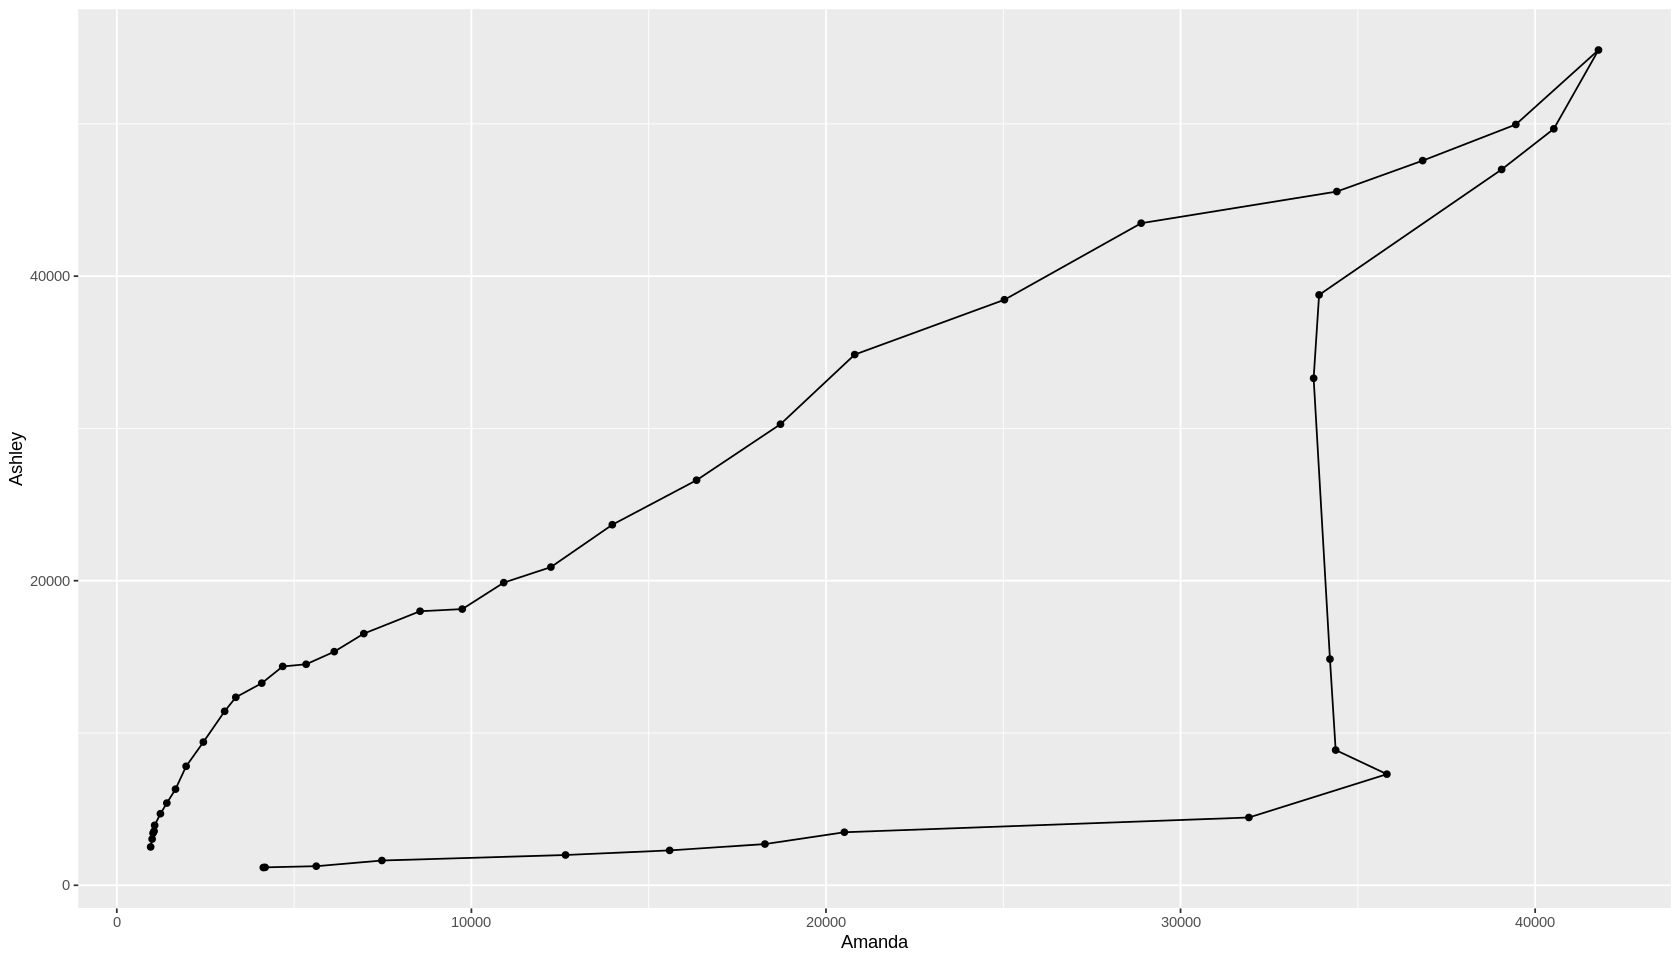

In [15]:
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)

# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# plot

# Define your custom plot size
options(repr.plot.width = 14, repr.plot.height = 8)
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point() +
     geom_segment(aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  )
      ) 

In [20]:
install.packages('hrbrthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gdtools’


Warning message in install.packages("hrbrthemes"):
“installation of package ‘gdtools’ had non-zero exit status”
Warning message in install.packages("hrbrthemes"):
“installation of package ‘hrbrthemes’ had non-zero exit status”


Warning message:
“Removed 1 rows containing missing values (geom_segment).”


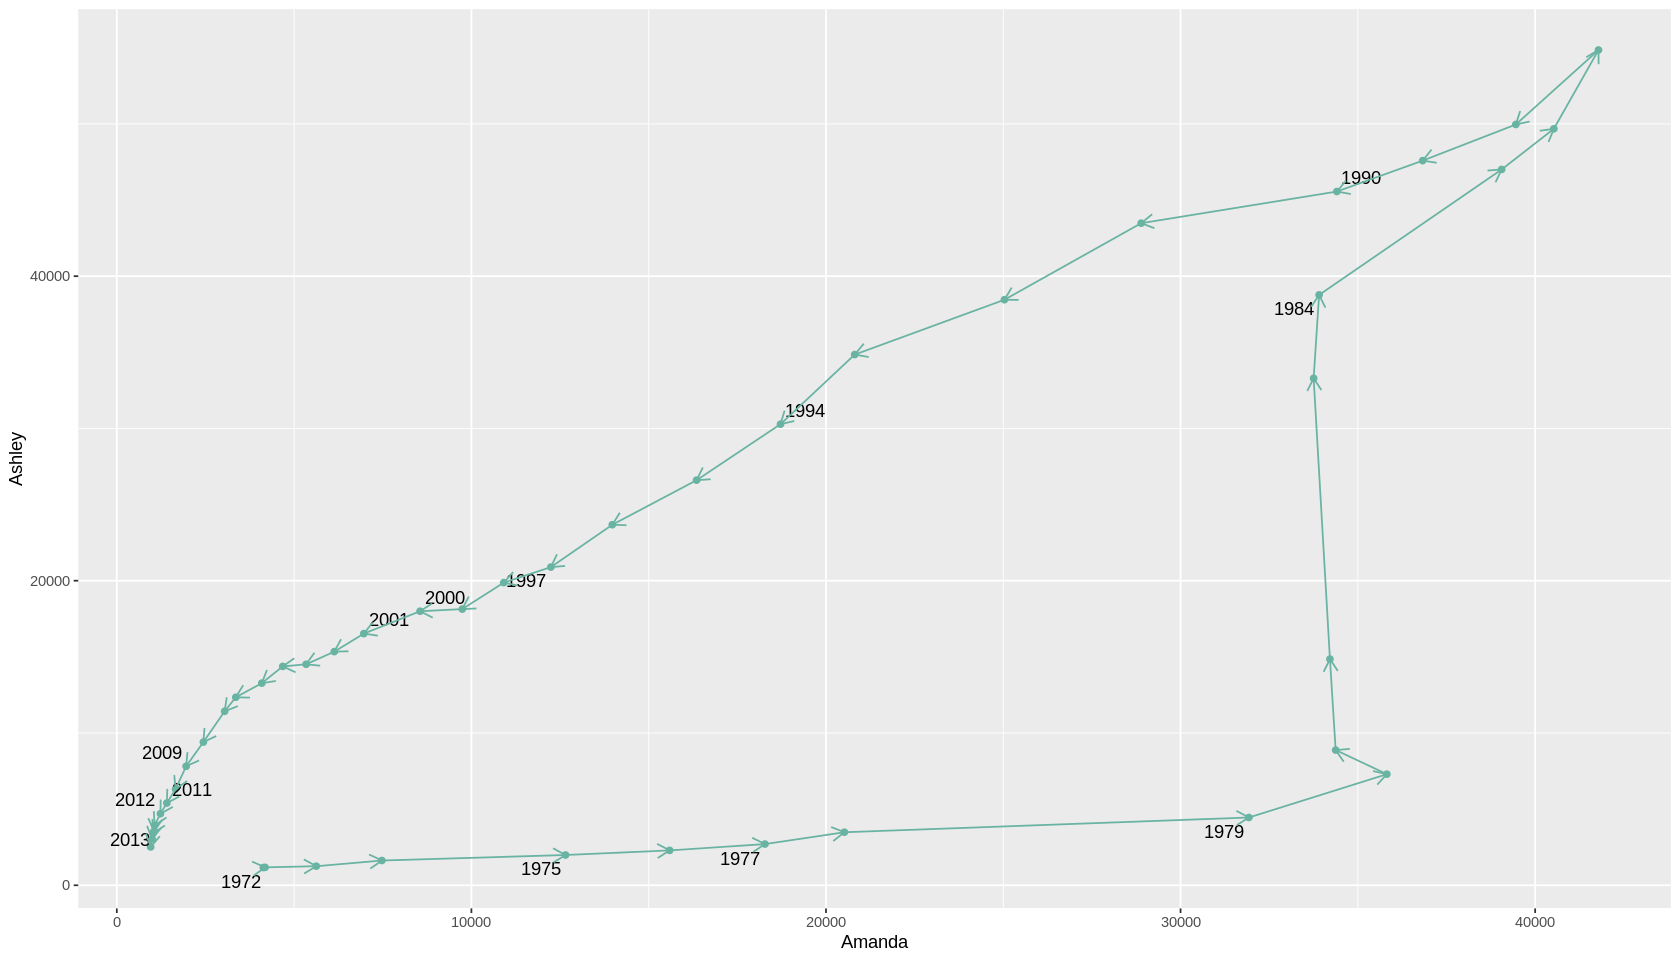

In [23]:
# Libraries
library(ggplot2)
library(dplyr)
library(babynames)
library(ggrepel)
library(tidyr)


# data
data <- babynames %>% 
  filter(name %in% c("Ashley", "Amanda")) %>%
  filter(sex=="F") %>%
  filter(year>1970) %>%
  select(year, name, n) %>%
  spread(key = name, value=n, -1)

# Select a few date to label the chart
tmp_date <- data %>% sample_frac(0.3)

# plot 
data %>% 
  ggplot(aes(x=Amanda, y=Ashley, label=year)) +
     geom_point(color="#69b3a2") +
     geom_text_repel(data=tmp_date) +
     geom_segment(color="#69b3a2", 
                  aes(
                    xend=c(tail(Amanda, n=-1), NA), 
                    yend=c(tail(Ashley, n=-1), NA)
                  ),
                  arrow=arrow(length=unit(0.3,"cm"))
      ) 
      

## Mirror Histogram

* The following code only runs on the RStudio with local machine. Google colab does not provide the  `hrbrthemes` library till now. So, if you want to create a mirror histogram, you hav to use local machine 

```r
install.packages('hrbrthemes')
library(ggplot2)
library(hrbrthemes)

# Dummy data
data <- data.frame(
  var1 = rnorm(1000),
  var2 = rnorm(1000, mean=2)
)

# Chart
plot <- ggplot(data, aes(x=x) ) +
  # Top
  geom_density( aes(x = var1, y = ..density..), fill="#69b3a2" ) +
  geom_label( aes(x=4.5, y=0.25, label="variable1"), color="#69b3a2") +
  # Bottom
  geom_density( aes(x = var2, y = -..density..), fill= "#404080") +
  geom_label( aes(x=4.5, y=-0.25, label="variable2"), color="#404080") +
  theme_ipsum() +
  xlab("value of x")


```



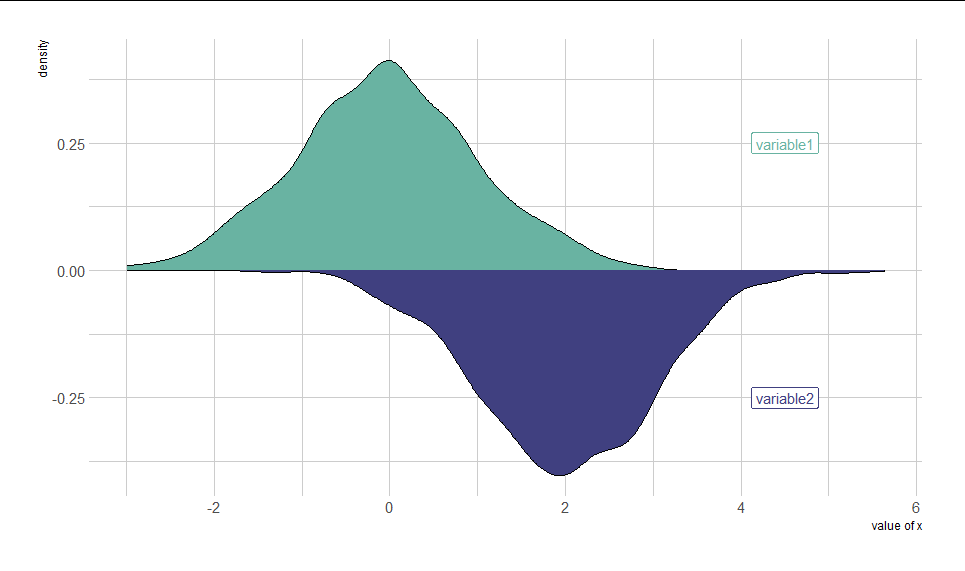

## Multifacet Histogram

* The following code only runs on the RStudio with local machine. Google colab does not provide the  `hrbrthemes` library till now. So, if you want to create a mirror histogram, you hav to use local machine 


```r

# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)
library(forcats)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/zonination/perceptions/master/probly.csv", header=TRUE, sep=",")
data <- data %>%
  gather(key="text", value="value") %>%
  mutate(text = gsub("\\.", " ",text)) %>%
  mutate(value = round(as.numeric(value),0))

# plot
plot <- data %>%
  mutate(text = fct_reorder(text, value)) %>%
  ggplot( aes(x=value, color=text, fill=text)) +
  geom_histogram(alpha=0.6, binwidth = 5) +
  scale_fill_viridis(discrete=TRUE) +
  scale_color_viridis(discrete=TRUE) +
  theme_ipsum() +
  theme(
    legend.position="none",
    panel.spacing = unit(0.1, "lines"),
    strip.text.x = element_text(size = 8)
  ) +
  xlab("") +
  ylab("Assigned Probability (%)") +
  facet_wrap(~text)

plot
```


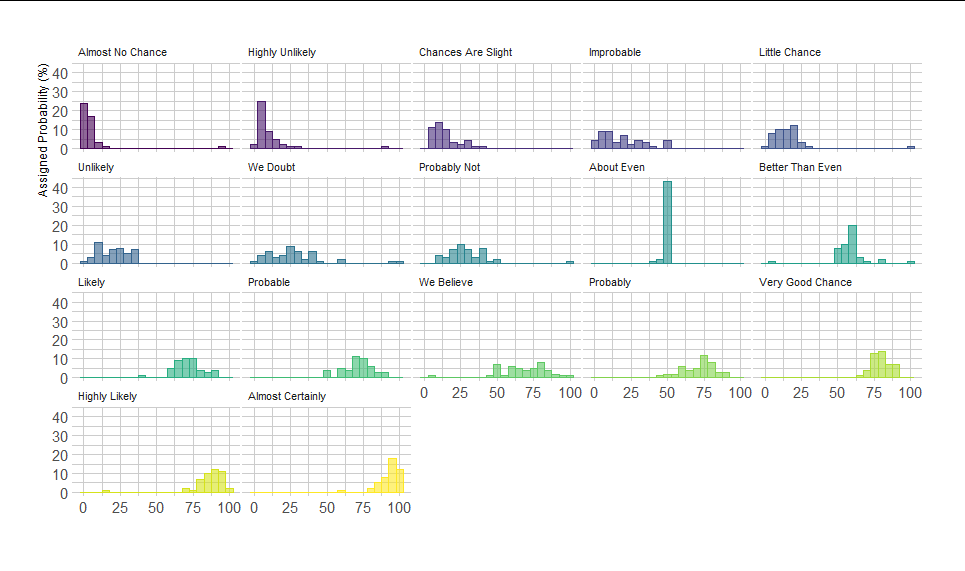

## Box plots

### What a box plot tells?

A boxplot gives a nice summary of one or more numeric variables. A boxplot is composed of several elements:

* The line that divides the box into 2 parts represents the median of the data. If the median is 10, it means that there are the same number of data points below and above 10.
* The ends of the box shows the upper (Q3) and lower (Q1) quartiles. If the third quartile is 15, it means that 75% of the observation are lower than 15.
* The difference between Quartiles 1 and 3 is called the interquartile range (IQR)
* The extreme line shows Q3+1.5xIQR to Q1-1.5xIQR (the highest and lowest value excluding outliers).
* Dots (or other markers) beyond the extreme line shows potntial outliers.

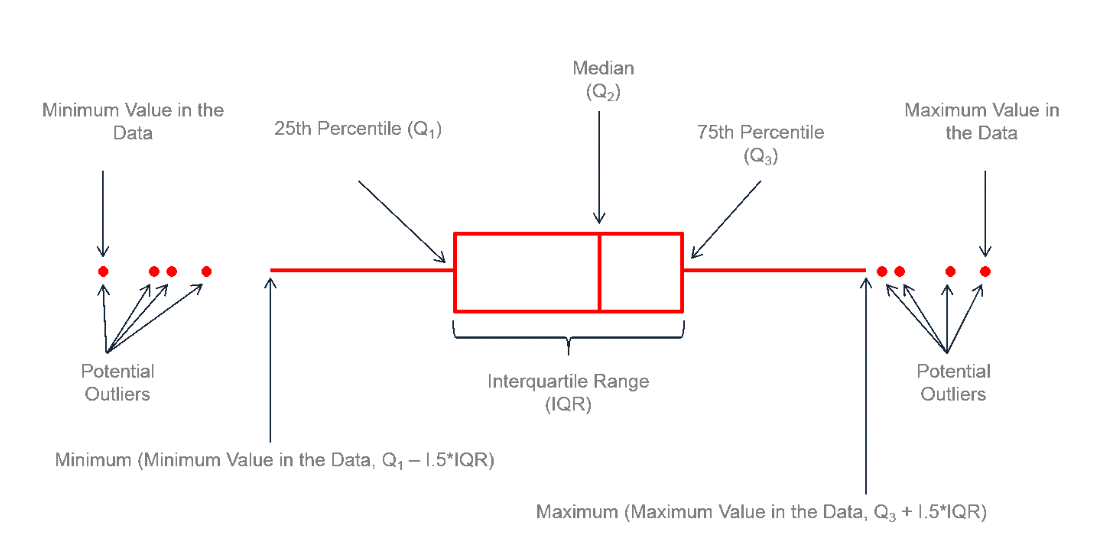

### Box plot with jitter

* Need to be run on the local machine


```r
# Libraries
library(tidyverse)
library(hrbrthemes)
library(viridis)

# create a dataset
data <- data.frame(
  name=c( rep("A",500), rep("B",500), rep("B",500), rep("C",20), rep('D', 100)  ),
  value=c( rnorm(500, 10, 5), rnorm(500, 13, 1), rnorm(500, 18, 1), rnorm(20, 25, 4), rnorm(100, 12, 1) )
)

# Plot
data %>%
  ggplot( aes(x=name, y=value, fill=name)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6) +
    geom_jitter(color="black", size=0.4, alpha=0.9) +
    theme_ipsum() +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("A boxplot with jitter") +
    xlab("")
```

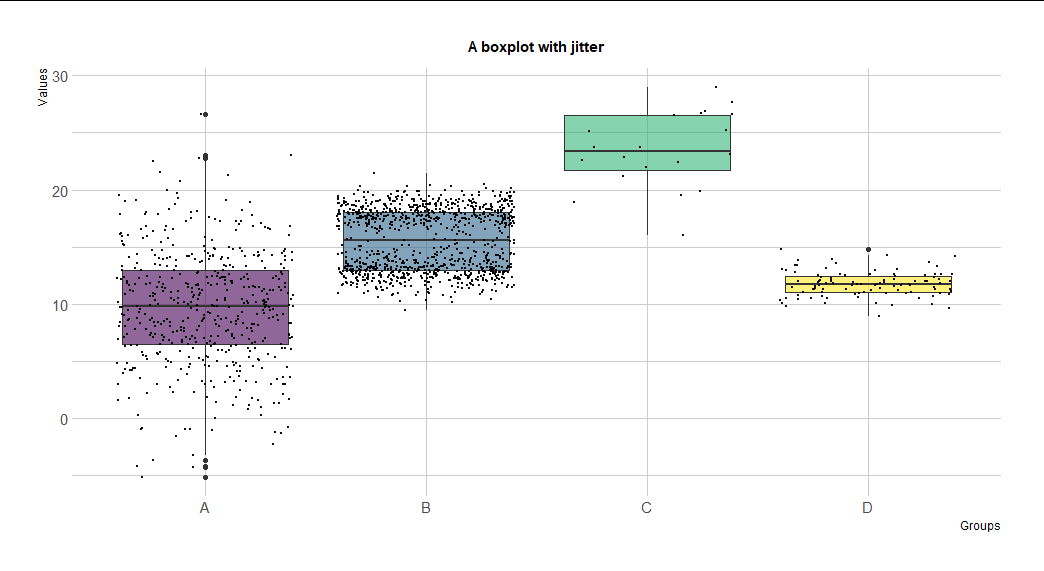

### Box plot multiple groups & level with facets

```r


```

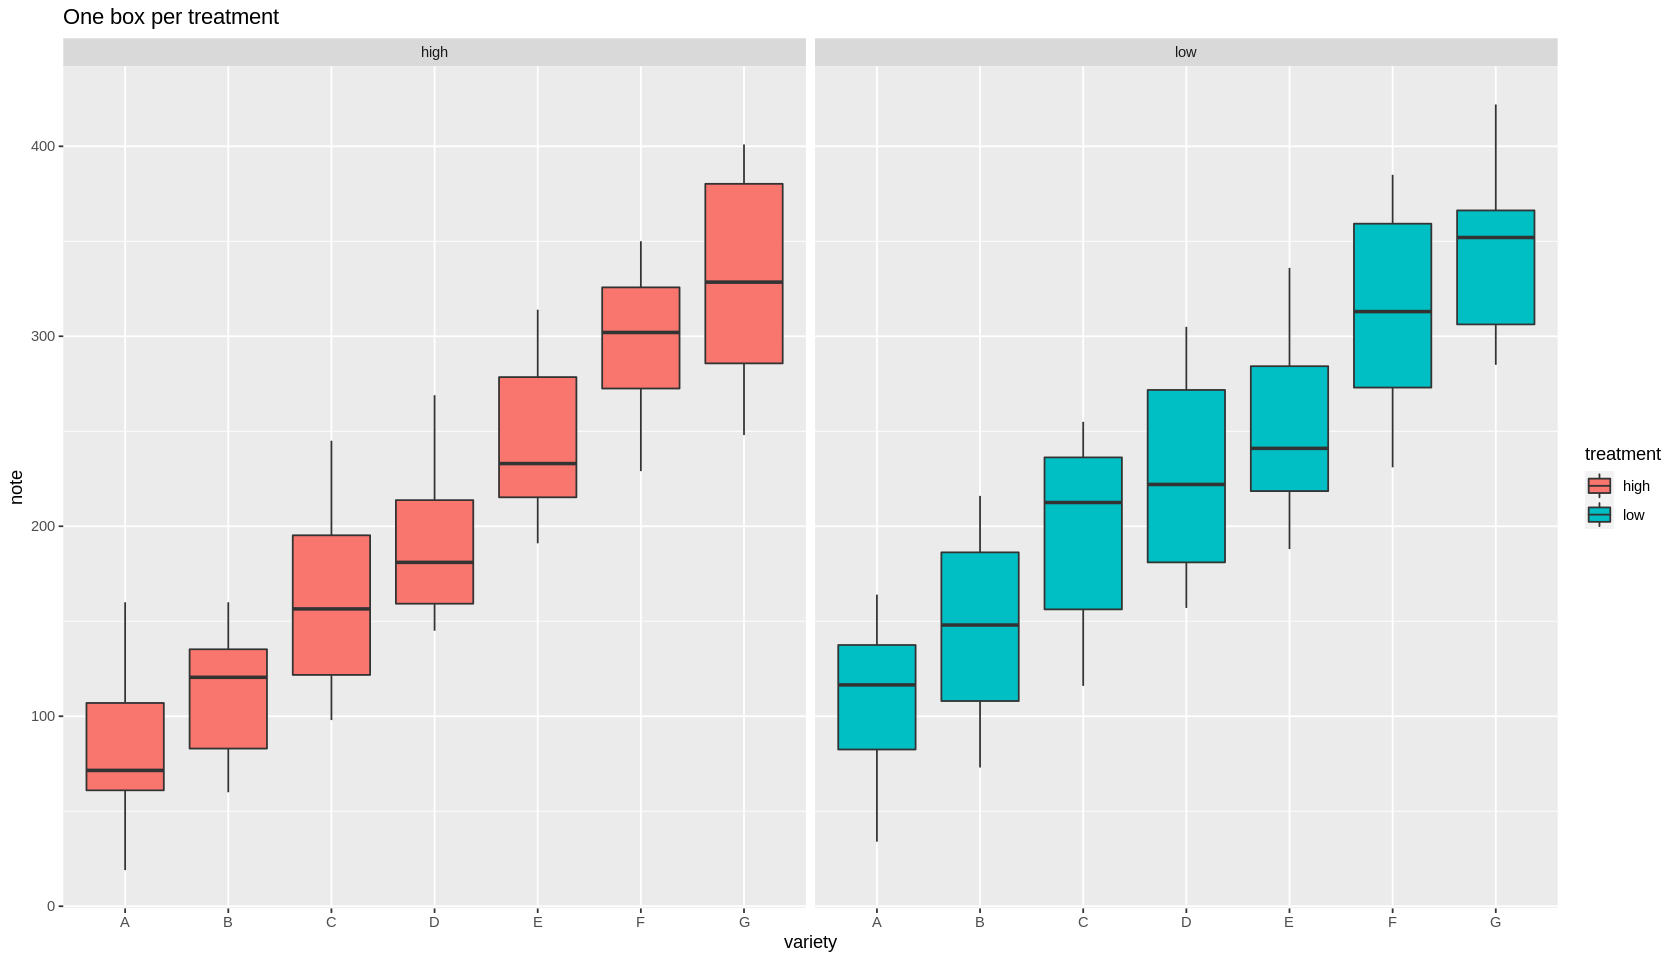

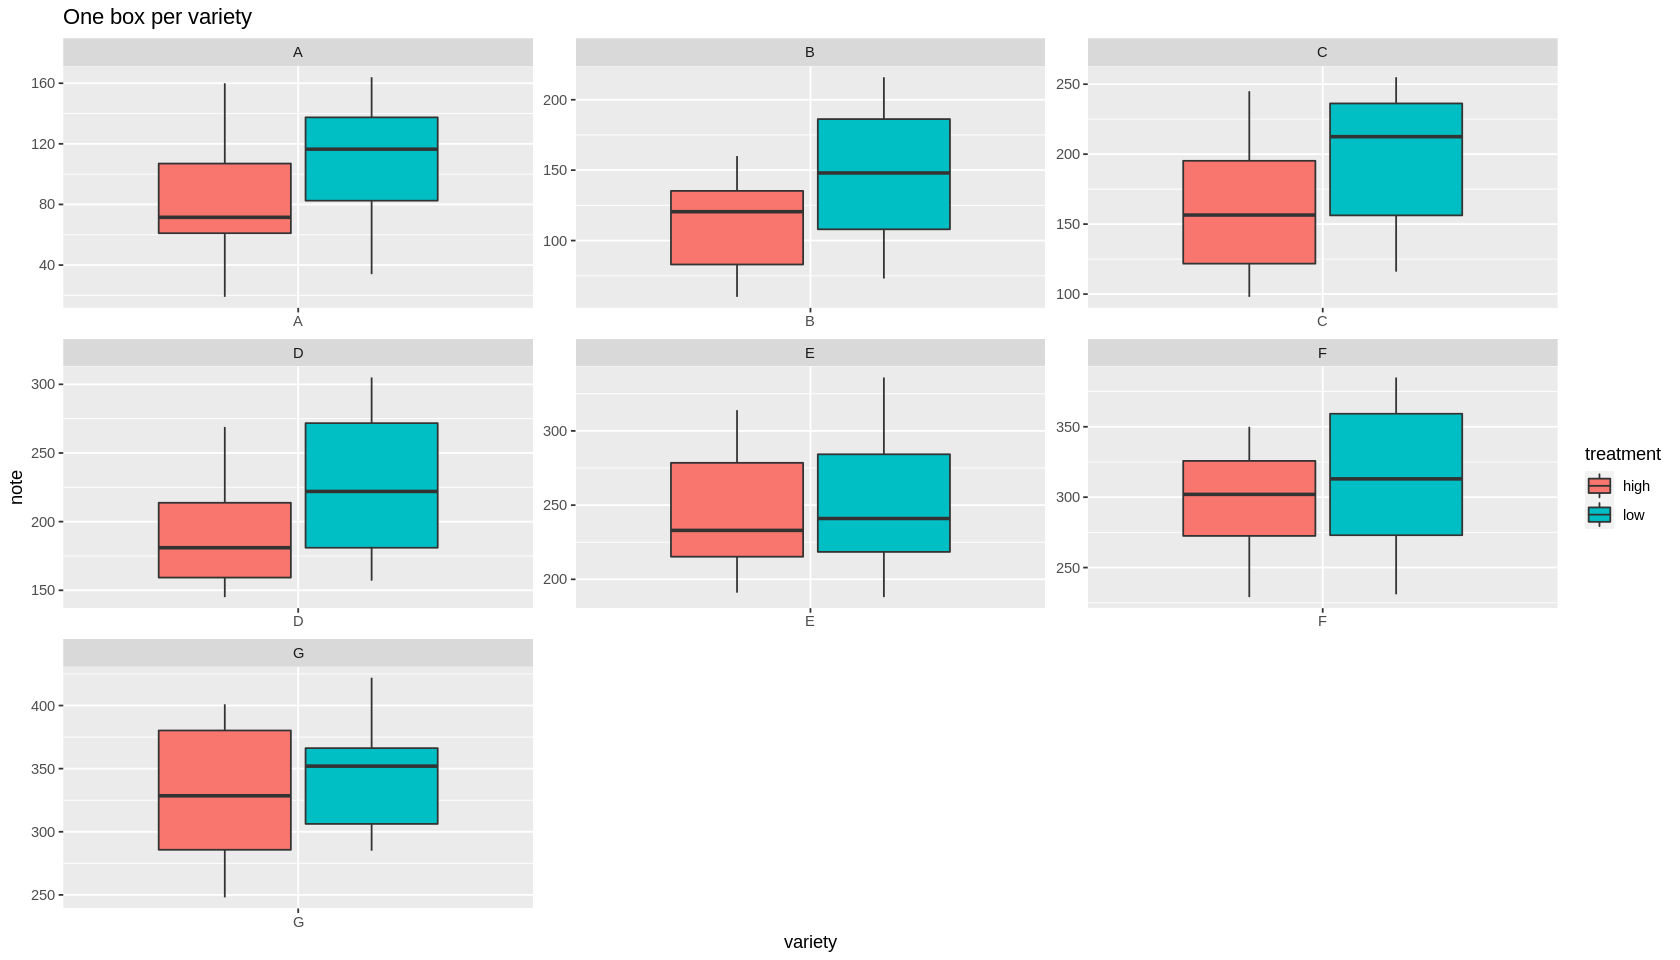

In [37]:
library(ggplot2)

# create a data frame
variety=rep(LETTERS[1:7], each=40)
treatment=rep(c("high","low"),each=20)
note=seq(1:280)+sample(1:150, 280, replace=T)
data=data.frame(variety, treatment ,  note)


options(repr.plot.width = 14, repr.plot.height = 8)
# One box per treatment
p1 <- ggplot(data, aes(x=variety, y=note, fill=treatment)) + 
  geom_boxplot() +
  facet_wrap(~treatment)+
  ggtitle("One box per treatment")

# one box per variety
p2 <- ggplot(data, aes(x=variety, y=note, fill=treatment)) + 
  geom_boxplot() +
  facet_wrap(~variety, scale="free")+
  ggtitle("One box per variety")

p1 
p2

## Line Plots

In [40]:
# Create dummy data
data <- data.frame(
  cond = rep(c("condition_1", "condition_2"), each=10), 
  my_x = 1:100 + rnorm(100,sd=9), 
  my_y = 1:100 + rnorm(100,sd=16) 
)


`geom_smooth()` using formula 'y ~ x'



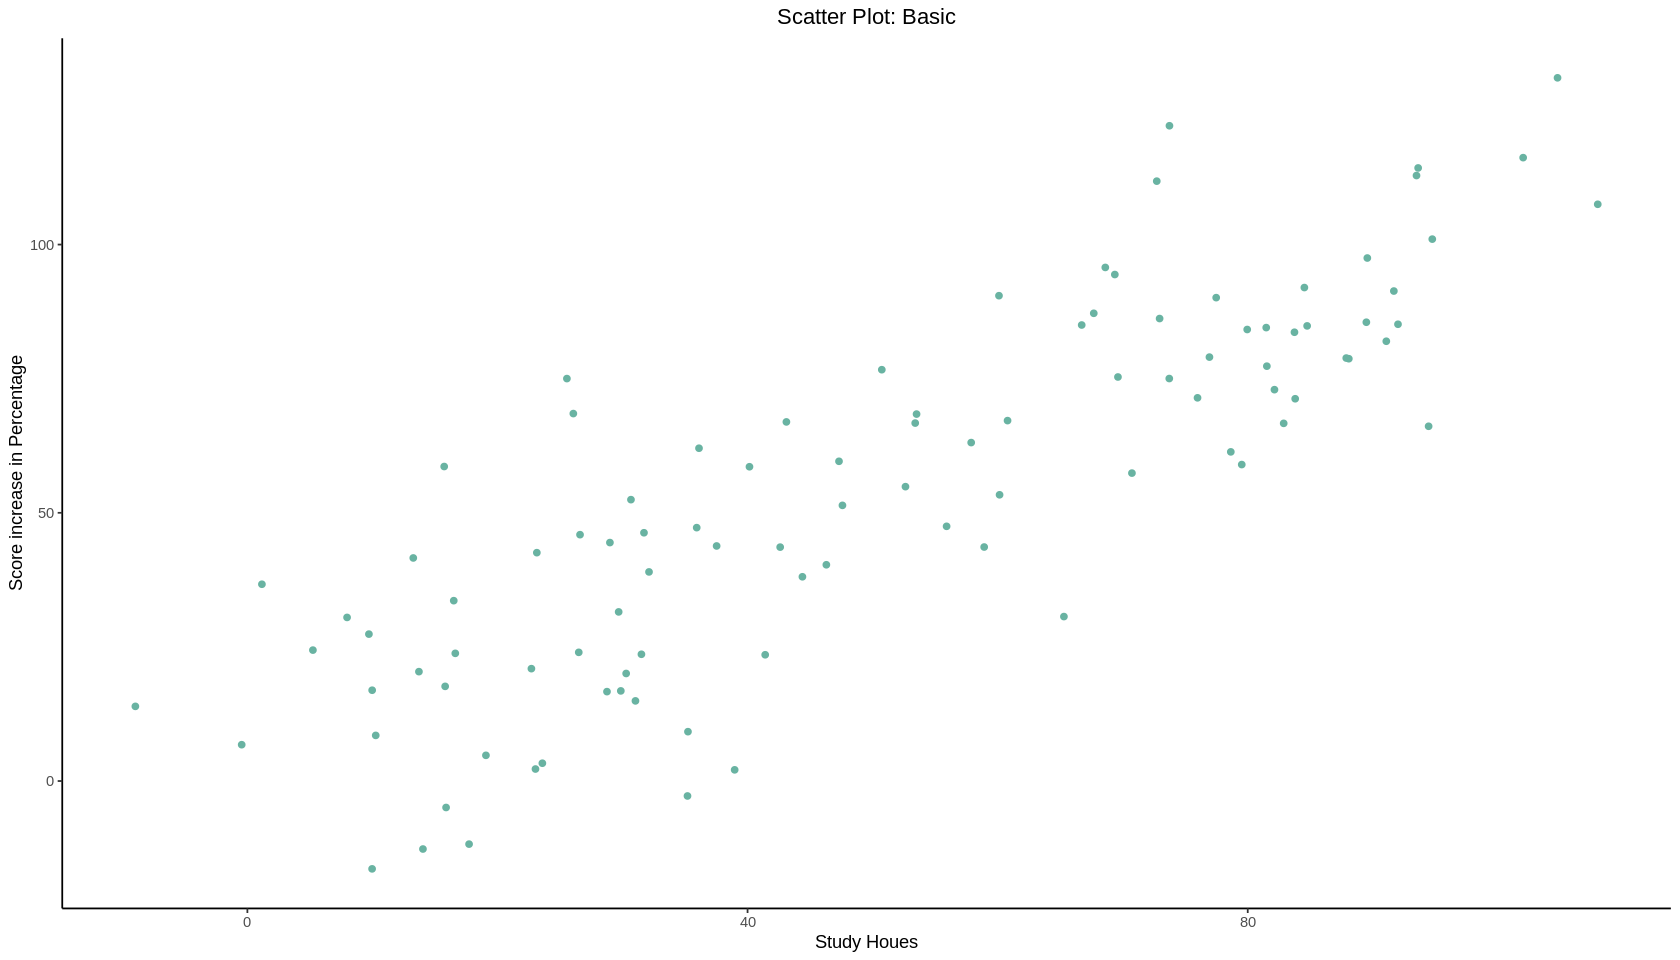

`geom_smooth()` using formula 'y ~ x'



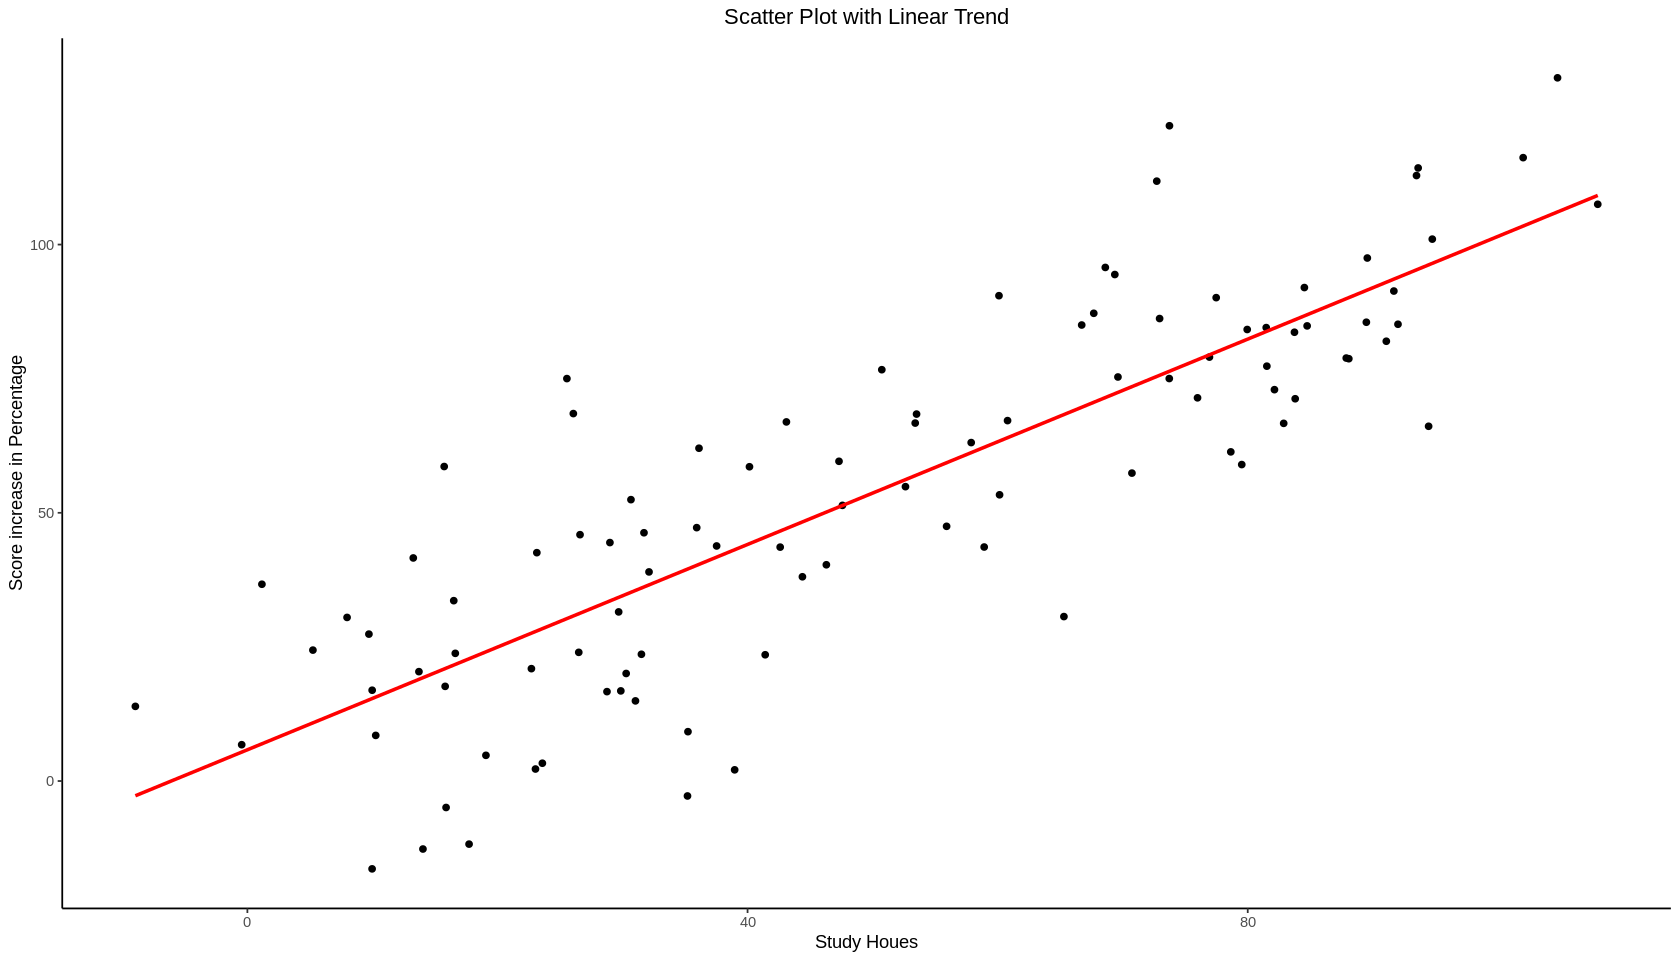

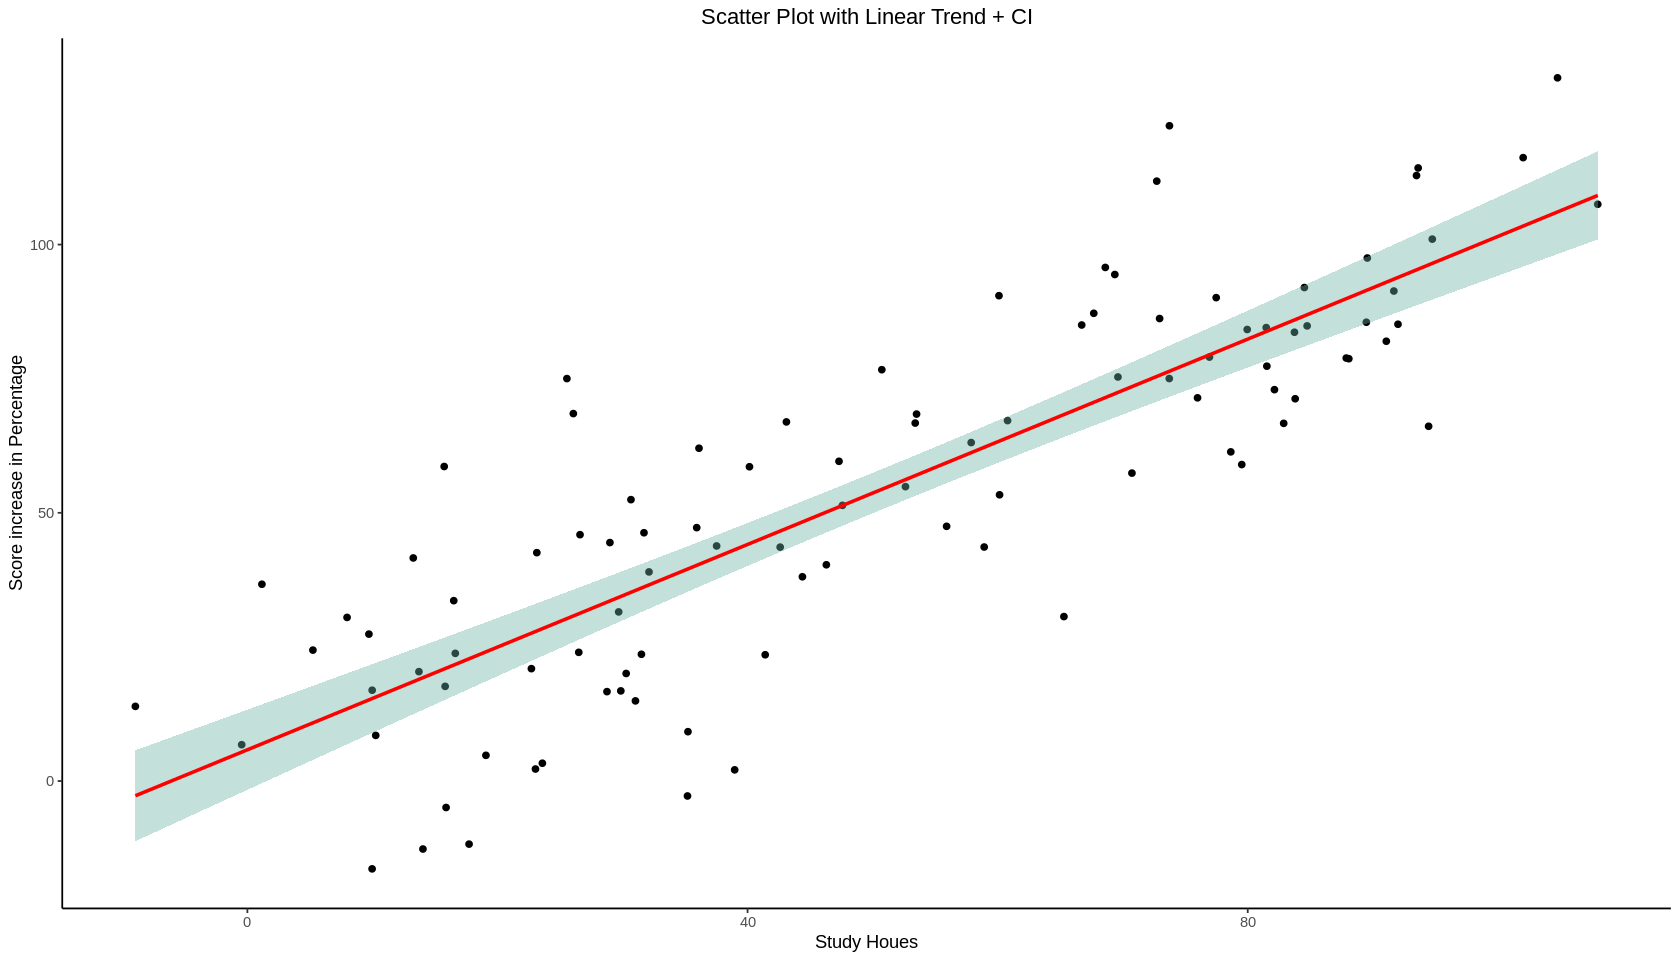

In [42]:
# Basic scatter plot.
p1 <- ggplot(data, aes(x=my_x, y=my_y)) + 
  geom_point( color="#69b3a2") +
  theme_classic()+
  labs(y = "Score increase in Percentage", x = "Study Houes")+
  ggtitle("Scatter Plot: Basic")+
  theme(plot.title = element_text(hjust = 0.5)) # center title

# with linear trend
p2 <- ggplot(data, aes(x=my_x, y=my_y)) +
  geom_point() +
  geom_smooth(method=lm , color="red", se=FALSE) +
  theme_classic()+
  labs(y = "Score increase in Percentage", x = "Study Houes")+
  ggtitle("Scatter Plot with Linear Trend")+
  theme(plot.title = element_text(hjust = 0.5))

# linear trend + confidence interval
p3 <- ggplot(data, aes(x=my_x, y=my_y)) +
  geom_point() +
  geom_smooth(method=lm , color="red", fill="#69b3a2", se=TRUE) +
  theme_classic()+
  labs(y = "Score increase in Percentage", x = "Study Houes")+
  ggtitle("Scatter Plot with Linear Trend + CI")+
  theme(plot.title = element_text(hjust = 0.5))

p1
p2
p3



## Heat Map, CorrPlot

### Corrplot with Customized color and numeric corr values 

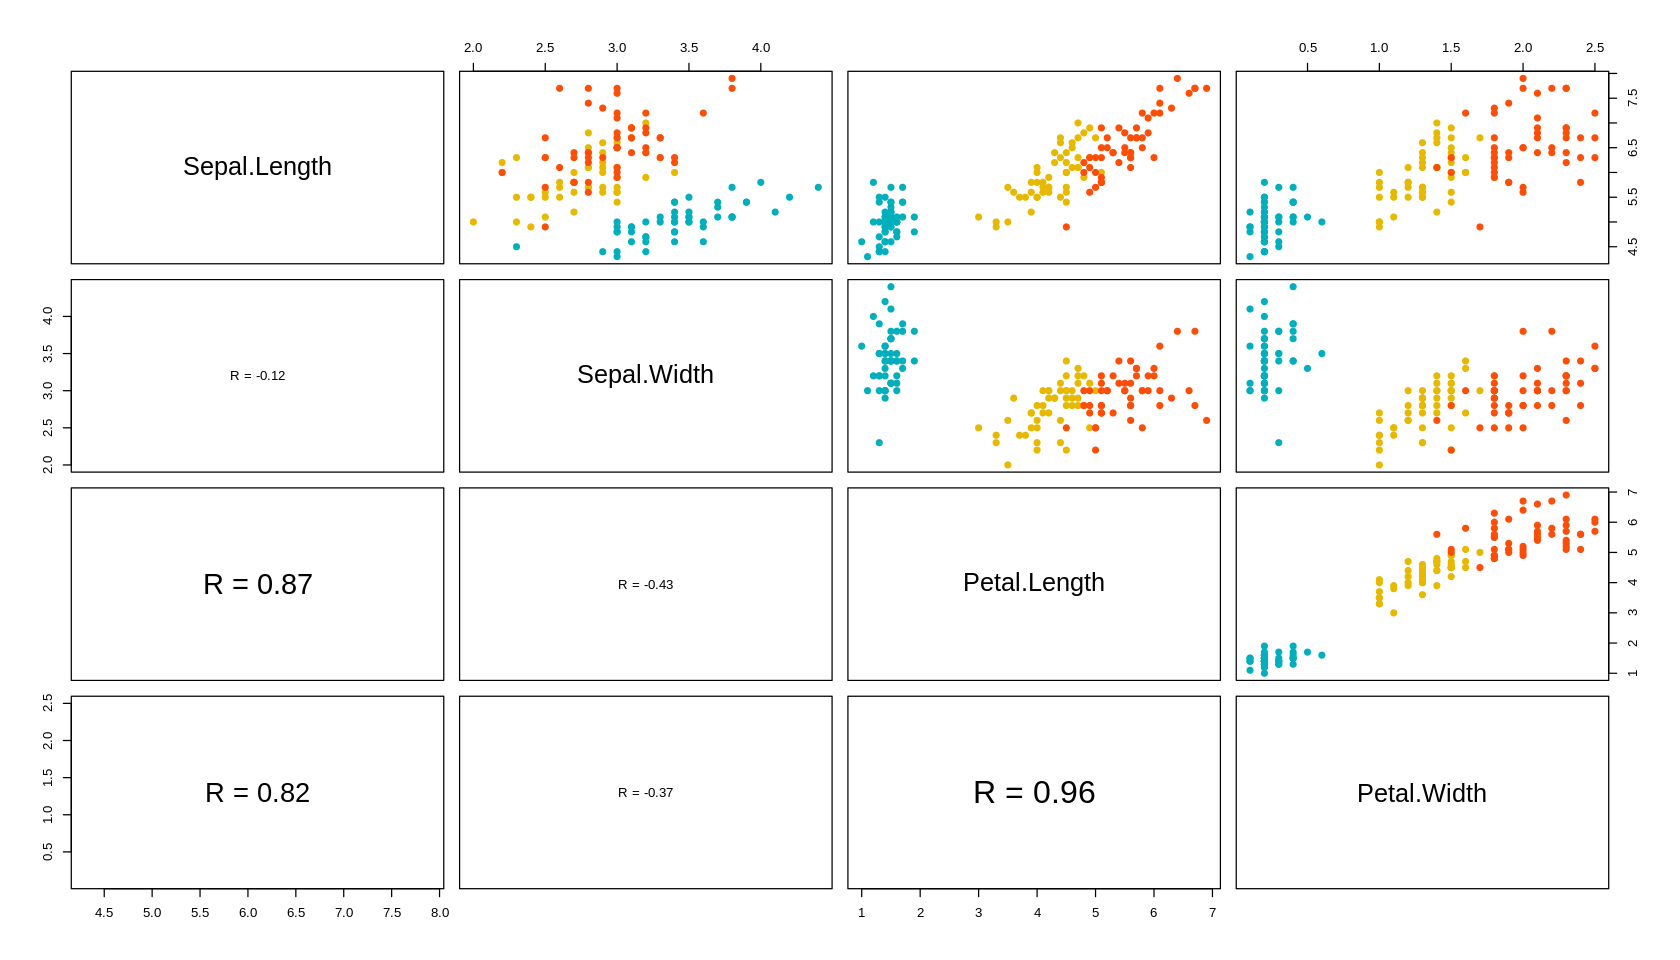

In [45]:
my_cols <- c("#00AFBB", "#E7B800", "#FC4E07")  

# Correlation panel
panel.cor <- function(x, y){
    usr <- par("usr"); on.exit(par(usr))
    par(usr = c(0, 1, 0, 1))
    r <- round(cor(x, y), digits=2)
    txt <- paste0("R = ", r)
    cex.cor <- 0.8/strwidth(txt)
    text(0.5, 0.5, txt, cex = cex.cor * r)
}
# Customize upper panel
upper.panel<-function(x, y){
  points(x,y, pch = 19, col = my_cols[iris$Species])
}
# Create the plots
pairs(iris[,1:4], 
      lower.panel = panel.cor,
      upper.panel = upper.panel)

In [47]:
install.packages('GGally')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



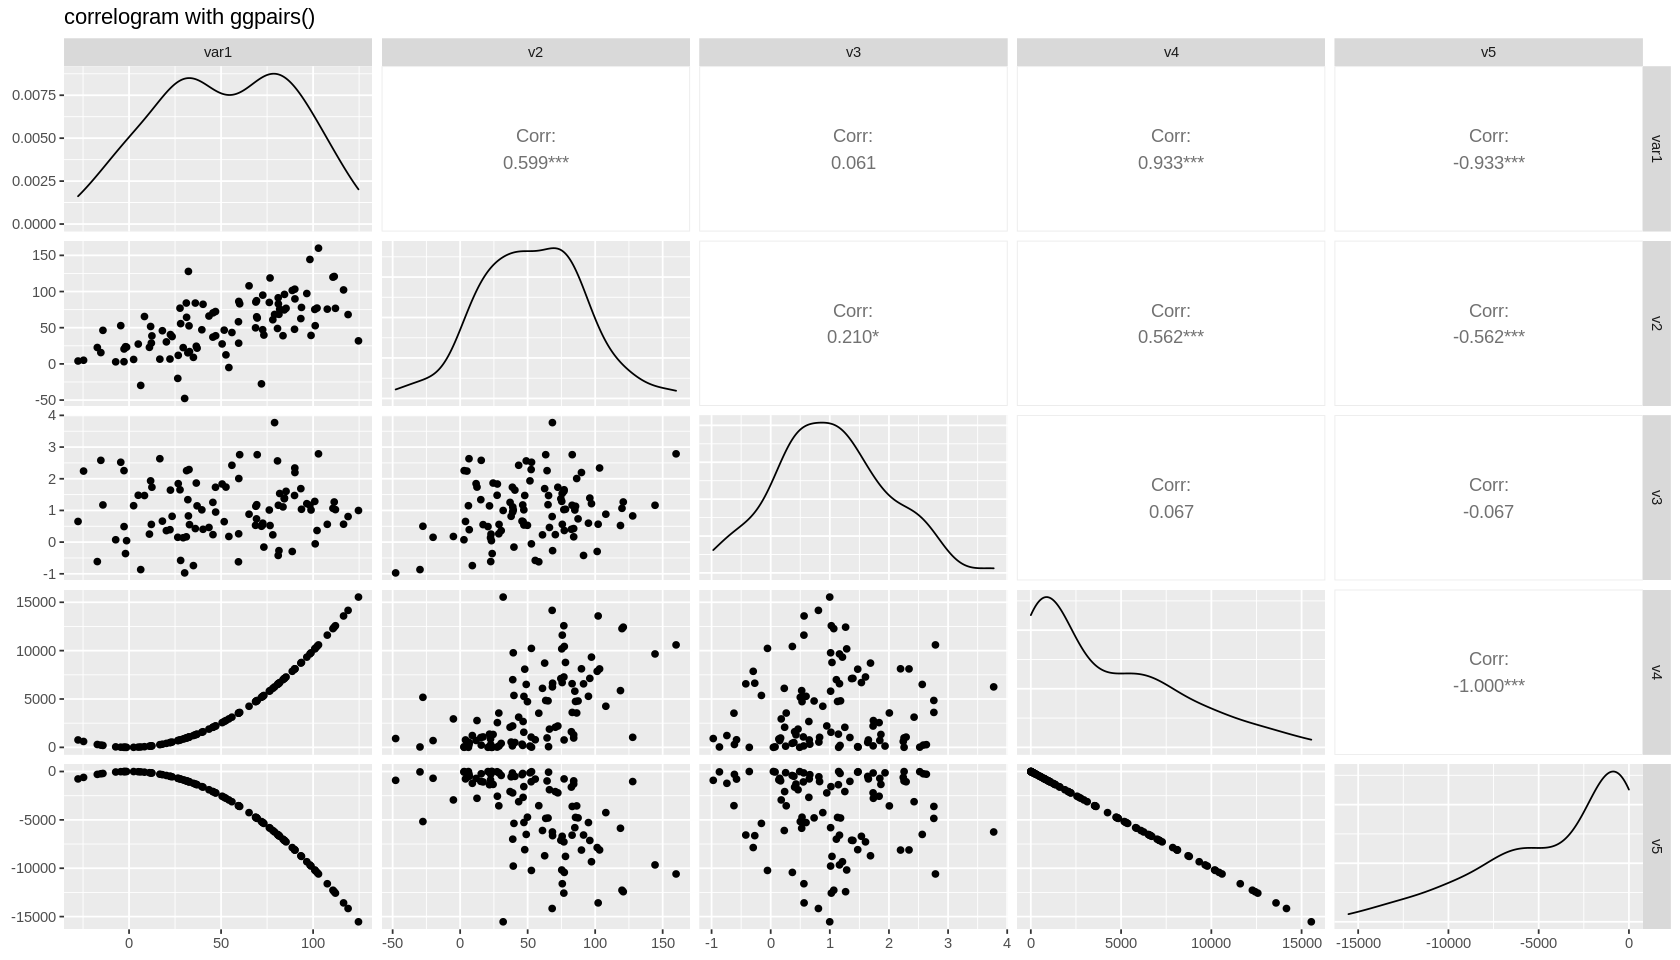

In [48]:
# Quick display of two cabapilities of GGally, to assess the distribution and correlation of variables 
library(GGally)

 
# Create data 
data <- data.frame( var1 = 1:100 + rnorm(100,sd=20), v2 = 1:100 + rnorm(100,sd=27), v3 = rep(1, 100) + rnorm(100, sd = 1)) 
data$v4 = data$var1 ** 2 
data$v5 = -(data$var1 ** 2) 
 
# Check correlations (as scatterplots), distribution and print corrleation coefficient 
ggpairs(data, title="correlogram with ggpairs") 